# **Veri Temizleme (Data Cleaning)**

Veri temizleme, veri ön işlemede önemli bir adımdır. Veri kalitesini ve güvenilirliğini artırmak için veri setindeki hataların, tutarsızlıkların ve yanlışlıkların belirlenmesini ve düzeltilmesini veya kaldırılmasını içerir. İşte bazı yaygın veri temizleme yöntemleri:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')

### Verimize genel olarak bakalım

In [6]:
data.describe()

,Index,Age,Rating,Established
count,29.000000,22.000000,28.000000,29.000000
mean,14.000000,41.545455,3.528571,1638.620690
std,8.514693,28.260232,2.825133,762.079599
min,0.000000,3.000000,-1.000000,-1.000000
25%,7.000000,22.750000,1.050000,1935.000000
50%,14.000000,35.000000,4.200000,1984.000000
75%,21.000000,54.250000,5.400000,1999.000000
max,28.000000,140.000000,7.800000,2020.000000


In [7]:
data.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


## **Handling missing values:**

* Boş değerlere sahip satırlar var mı? Tümünde veri olmayan sütun var mı? Hangi veriler eksik ve neden?
* Eksik değerleri ortalama, medyan, mod gibi istatistiksel bir ölçütle değiştirerek veya regresyon sonucu gibi daha gelişmiş teknikler kullanarak değerlendirin.

In [8]:
print("Eksik değerlerin özet istatistikleri:")
print(data.isnull().sum())

Eksik değerlerin özet istatistikleri:
Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


In [9]:
data["Age"].mean()

41.54545454545455

In [10]:
data["Rating"].mean()

3.528571428571429

### Eksik değerleri ortalama ile doldurma


In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
data["Age"].mean()

41.54545454545455

In [ ]:
data["Rating"].mean()

3.528571428571429

Age ve Rating kolonlarının ortalaması değişmedi.

### Eksik değerlerin doldurulmuş halini kontrol etme

In [ ]:
print("\nEksik değerlerin doldurulmuş hali:")
print(data.isnull().sum())


Eksik değerlerin doldurulmuş hali:
Index          0
Age            0
Salary         0
Rating         0
Location       0
Established    0
Easy Apply     0
dtype: int64


In [ ]:
data.describe()

,Index,Age,Rating,Established
count,29.000000,29.000000,29.000000,29.000000
mean,14.000000,41.545455,3.528571,1638.620690
std,8.514693,24.474079,2.774225,762.079599
min,0.000000,3.000000,-1.000000,-1.000000
25%,7.000000,25.000000,1.400000,1935.000000
50%,14.000000,41.545455,4.000000,1984.000000
75%,21.000000,44.000000,5.400000,1999.000000
max,28.000000,140.000000,7.800000,2020.000000


In [ ]:
data.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.000000,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.000000,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,41.545455,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.000000,$44k-$99k,4.4,India In,1988,-1
4,4,25.000000,$44k-$99k,6.4,Australia Aus,2002,-1


# **Outlier Detection**

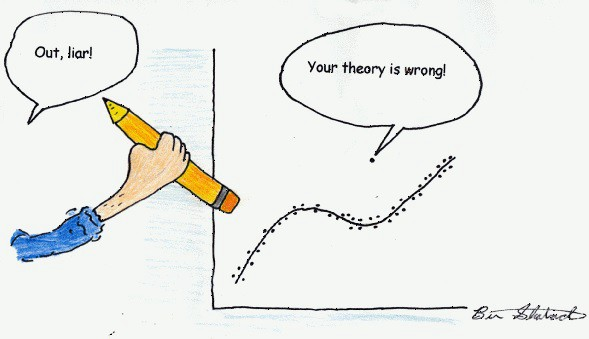

Aykırı değerler, uç noktalarda yer alan veri noktalarıdır.

Genellikle çok yüksek veya çok düşük değerlere sahiptirler:

* Antarktika'daki bir termometrenin 100º göstermesi
* Yılda 0,01 $ değerinde ürün satın alan bir müşteri

## Standart Sapma Metotu

Standart sapma, varyansın bir ölçüsüdür, yani veri noktalarının ortalamadan ne kadar yayıldığını gösterir. İstatistikte, bir veri dağılımı yaklaşık olarak normalse, veri değerlerinin yaklaşık %68'i ortalamanın bir standart sapması içinde, yaklaşık %95'i iki standart sapma içinde ve yaklaşık %99,7'si üç standart sapma içinde yer alır

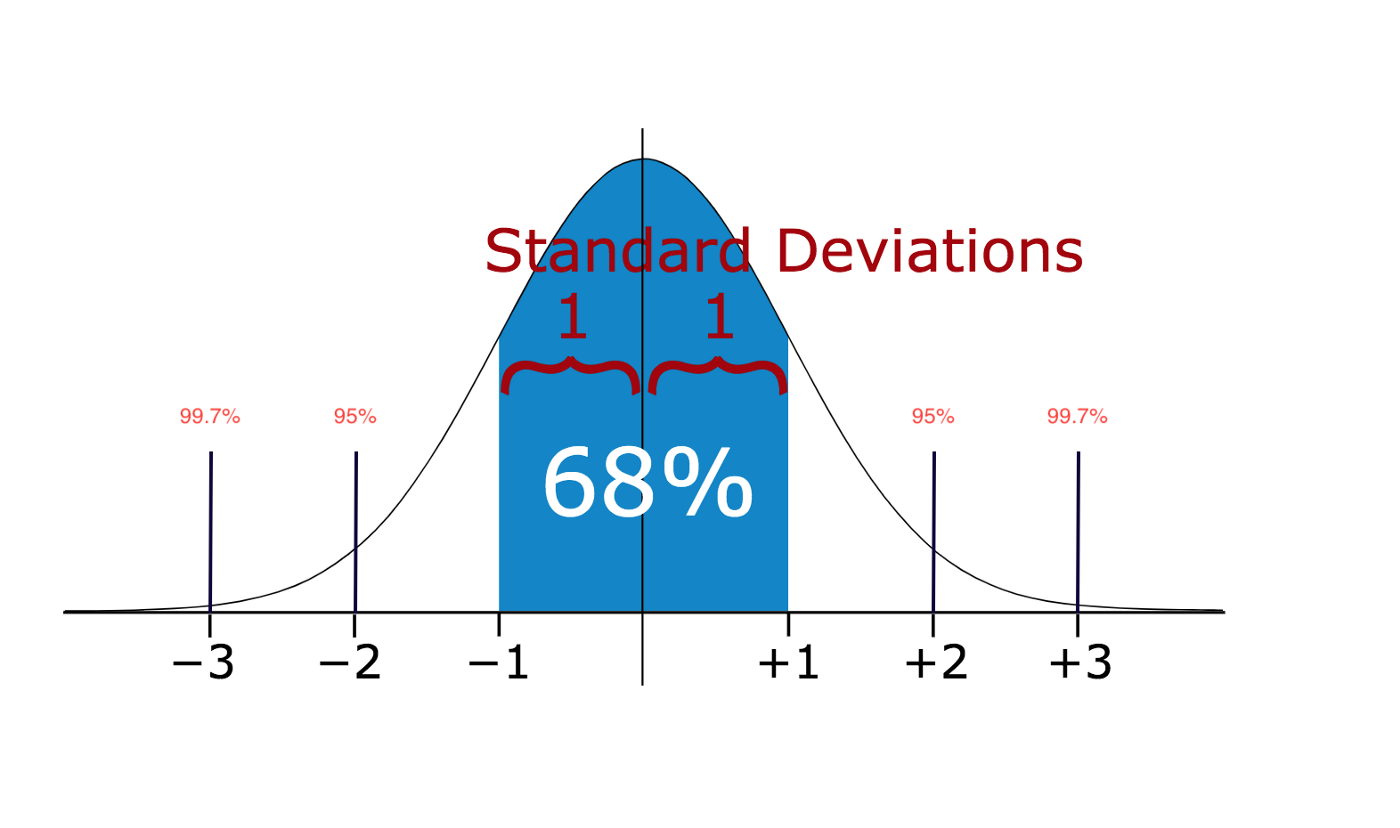

In [ ]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    upper_outlier = df[df[column] > upper]
    lower_outlier = df[df[column] < lower]
    return upper_outlier, lower_outlier

In [ ]:
upper_outlier, lower_outlier = out_std(data, 'Age')
print('Total number of outliers are', upper_outlier.shape[0]+ lower_outlier.shape[0])

The lower bound value is -31.876781019288885
The upper bound value is 114.96769011019798
Total number of outliers are 1


In [ ]:
if (len(upper_outlier) + len(lower_outlier)) > 0:
  print("Outliers:")
  for i in range(len(upper_outlier)):
    print(upper_outlier.iloc[i]["Age"])


Outliers:
140.0
